In [1]:
sc.install_pypi_package('graphframes')
from graphframes import *

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1592101387252_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
sc.install_pypi_package('networkx')
sc.install_pypi_package('matplotlib')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
# read in the csv files on S3
vertices = spark.read.csv('s3://finalproject2020/tweet_nodes_2.csv', header = True) 
edges = spark.read.csv('s3://finalproject2020/tweet_edges_2.csv', header = True)

vertices = vertices.withColumnRenamed('node', 'id')
edges = (edges.withColumnRenamed('source', 'src')
              .withColumnRenamed('dest', 'dst')
        )
g = GraphFrame(vertices, edges) #initialize graphframe with vertices and edges

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
# Show Vertices and Edges
g.vertices.show(5)
g.edges.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+-------------------+
|            id|               type|
+--------------+-------------------+
|   smaddiebird|          user_name|
| MadisonSedona|retweeted_user_name|
|     PhydeauxL|          user_name|
|RepAndyBiggsAZ|retweeted_user_name|
| connect2damon|          user_name|
+--------------+-------------------+
only showing top 5 rows

+-------------+--------------+
|          src|           dst|
+-------------+--------------+
|  smaddiebird| MadisonSedona|
|    PhydeauxL|RepAndyBiggsAZ|
|connect2damon|RepAndyBiggsAZ|
|  nwokolo_leo|  mazinwakamma|
|  AZPatriot16|RepAndyBiggsAZ|
+-------------+--------------+
only showing top 5 rows

### Centrality measures to identify influencers of misinformation

In [5]:
#count number of user_name (sources) and number of retweeted_user_name(destinations)
source_nodes = g.vertices.filter("type=='user_name'").count()
print("number of source nodes is {}".format(source_nodes))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

number of source nodes is 719

In [6]:
#count number of user_name (sources) and number of retweeted_user_name(destinations)
dst_nodes = g.vertices.filter("type=='retweeted_user_name'").count()
print("number of destination nodes is {}".format(dst_nodes))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

number of destination nodes is 719

In [7]:
# calculate degree centrality and in-degree(number of times being retweeted) and out-degree (number of the acts of retweeting)
g.degrees.sort('Degree', ascending=False).show()
g.outDegrees.sort('outDegree', ascending=False).show(5)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+------+
|             id|degree|
+---------------+------+
| RepAndyBiggsAZ|   105|
|  MadisonSedona|    45|
|     ninjashoes|    34|
|DeepStateExpose|    34|
|Real_Xi_Jinping|    33|
|     GarbageApe|    30|
|     HLAurora63|    20|
|      Raeequaza|    19|
|   NetHistorian|    19|
|      chbstone2|    15|
|       engadget|    13|
|BangkokPostNews|    12|
|        Nas_k27|    10|
|        The4HbK|     9|
| CuestionMarque|     8|
|     bryanbehar|     7|
|    MrMoeOthman|     7|
|     JimSierra1|     7|
|SquiddoSquidHea|     6|
|Purpose_Warrior|     6|
+---------------+------+
only showing top 20 rows

+-------------+---------+
|           id|outDegree|
+-------------+---------+
|    5G_Corona|        5|
| Philhaynes12|        4|
|  Lasso_Truth|        3|
|superyayadize|        3|
|    beth2_k3a|        3|
+-------------+---------+
only showing top 5 rows

In [10]:
#look at in-degree
g.inDegrees.sort('inDegree', ascending=False).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+--------+
|             id|inDegree|
+---------------+--------+
| RepAndyBiggsAZ|     104|
|  MadisonSedona|      45|
|     ninjashoes|      34|
|DeepStateExpose|      33|
|Real_Xi_Jinping|      33|
|     GarbageApe|      30|
|     HLAurora63|      20|
|   NetHistorian|      19|
|      Raeequaza|      19|
|      chbstone2|      15|
+---------------+--------+
only showing top 10 rows

It looks like in the misinformation network we scraped from twitter, the person/user who has been retweeted the most is `RepAndyBiggsAZ`. It seems this user has the highest in-degree number (as well as highest degree centrality). Judging the names of the users who have the highest degree centrality/ in-degrees number, such as "Real_Xi_Jinping" or "GarbageApe", I start to suspect that these accounts were bots.


In [12]:
# look at pagerank/ popularity
results = g.pageRank(resetProbability=0.01, maxIter=20)
results.vertices.select("id", "pagerank").distinct().sort('pagerank', ascending=False).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+------------------+
|             id|          pagerank|
+---------------+------------------+
| RepAndyBiggsAZ| 494.2874538790402|
|DeepStateExpose|153.94342136739982|
|        The4HbK|37.355303899738516|
|       frenbilt|14.037680406206855|
|    porksweats1|14.037680406206851|
|   DamesNotDead|  9.37415570750056|
|      BiddyBono| 4.710631008794252|
|   BloodShotEnt| 4.710631008794252|
|    onyiforlife| 4.710631008794252|
|     AV76185831| 4.710631008794252|
|TechNew18808812| 4.710631008794252|
|     HrollAugur| 4.710631008794252|
|  TheBiafraExit| 4.710631008794252|
| di_daisyistand| 4.710631008794252|
|     ninjashoes|1.5410164809824711|
|     GarbageApe|1.3966137697760823|
|  MadisonSedona|1.1459659726660072|
|     HLAurora63|0.9798112498292051|
|   NetHistorian|0.9331760028421378|
|      Raeequaza|0.9331760028421378|
+---------------+------------------+
only showing top 20 rows

The result shows `RepAndyBiggsAZ` is listed as having the highest pagerank number and is the most popular. 

### Finding patterns with motif

In [13]:
# find motif - a and c both retweets a tweet by b
# Use Network Motifs to Identify unique users who both retweets a certain user 
small_graph = (g.find("(a)-[]->(b); (c)-[]->(b)") # a, c are sources; b is the destination
             .filter("a != c") # where a!=c, i.e. sources are unique
             .dropDuplicates()
           ) # this returns a series of two heroes who co-occur in a given comic book
print("Network Motif Query Output:")
small_graph.show()

print("Selecting Specifically the Co-occuring/Collaborating Heroes:")
small_edges = small_graph.select(small_graph.b.id.alias("src"), small_graph.c.id.alias("dst"))
small_edges.show()



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Network Motif Query Output:
+--------------------+--------------------+--------------------+
|                   a|                   b|                   c|
+--------------------+--------------------+--------------------+
|[PhydeauxL, user_...|[RepAndyBiggsAZ, ...|[GaldeShelly, use...|
|[AZLD17GOP, user_...|[RepAndyBiggsAZ, ...|[jlsemmel, user_n...|
|[MWayneG, user_name]|[RepAndyBiggsAZ, ...|[Deech932, user_n...|
|[Carolbraziel7g1,...|[RepAndyBiggsAZ, ...|[AZPatriot16, use...|
|[evangie, user_name]|[RepAndyBiggsAZ, ...|[SandySueZoo, use...|
|[evangie, user_name]|[RepAndyBiggsAZ, ...|[cosmicStar55, us...|
|[Ladymacin_ride, ...|[RepAndyBiggsAZ, ...|[mcb40420, user_n...|
|[Ladymacin_ride, ...|[RepAndyBiggsAZ, ...|[throughthygrace,...|
|[Ladymacin_ride, ...|[RepAndyBiggsAZ, ...|[LyonsMme, user_n...|
|[2ndGives1st, use...|[RepAndyBiggsAZ, ...|[drizzle2, user_n...|
|[hooray2040, user...|[RepAndyBiggsAZ, ...|[Truth_Thunder, u...|
|[milothekemosabe,...|[RepAndyBiggsAZ, ...|[terri_grohal, us..

In [14]:
#create graphframe object
g_small = GraphFrame(vertices, small_edges)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
#you won't be able to plot a huge graph on python using memory very easily, so we would need to sample 
g_high_degree = GraphFrame(g_small.degrees, small_edges).filterVertices("degree > 30") 
g_high_degree.vertices.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+------+
|             id|degree|
+---------------+------+
|StephanieIngers|   210|
|   GregBurdick6|   210|
|       seburrus|   210|
|  Truth_Thunder|   210|
|      AZLD17GOP|   210|
| Bernadettea777|   210|
|blizzardcyclone|    66|
|  TrinityJRanch|   210|
|     irishhillk|    32|
|   Patricia350Z|    66|
|     KingKoobie|    66|
|     bruce24710|    66|
|MignonFeldstein|   210|
|hopingforachang|   210|
|       leesa_fl|   210|
|    HodderTracy|    32|
|    bigfoots101|   210|
|     avonlady70|   210|
|        RexVttr|   210|
|Deborahcox_caye|   210|
+---------------+------+
only showing top 20 rows

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

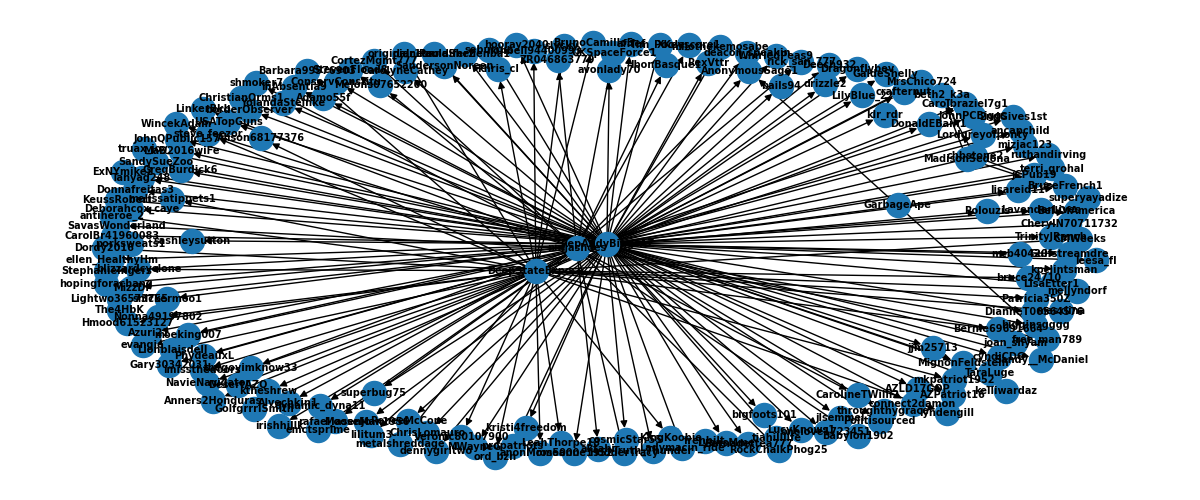

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

def PlotGraph(edge_list):
    G=nx.DiGraph()
    
    for row in edge_list.select('src', 'dst').collect():
        G.add_edge(row['src'], row['dst'])
    
    plt.figure(figsize=(12,5))
    nx.draw(G, 
            pos=nx.spring_layout(G), 
            with_labels=True, 
            font_weight='bold', 
            font_size=7
           )
    return

# Close previous plots; otherwise, will just overwrite and display again
plt.close()

# Plot Graph
PlotGraph(g_high_degree.edges)

%matplot plt

From this graph, we can see that compared to the destination nodes(can be understood as original misinformation tweet author), there are far fewer source nodes (users who retweet) (who are in the center of the circle). That is, while there seem to be many users who might post information that contain the key words I used to identify as misinformation, there seeem to be only 3 persons who are constantly retweeting these misinformation!  

If we can identify these users' identity as bots, this analysis might confirm previous studies by Dr. Kathleen Carley who found most of the covid-related misinformation is actually retweeted by bots.     

If these users in the center are not bots, the results here can be used to identify the true influencers on Twitter who are spreading misinformation. 